In [1]:
from corrfunc_helper import twoPointCFs as mycf

Read in LSS QSO catalogs

In [2]:
data = Table.read('../../../data/lss/eBOSS_QSO/eBOSS_QSO.fits')
rand = Table.read('../../../data/lss/eBOSS_QSO/eBOSS_QSO_randoms.fits')

Define coordinates, 3 tuple of RA, DEC, comoving distance

In [3]:
coords = (data['RA'], data['DEC'], data['comov_dist'])
randcoords = (rand['RA'], rand['DEC'], rand['comov_dist'])

Define projected radius bins, and maximum pi to integrate to

In [4]:
# bins of projected radius from 1 to 125 Mpc/h
rp_bins = np.logspace(0, 2.1, 50)
pimax = 40 # Mpc/h

Evaluate correlation function 

In [5]:
cf = mycf.autocorr_from_coords(coords=coords, randcoords=randcoords, scales=rp_bins, 
                               weights=data['weight'], randweights=rand['weight'], 
                               nthreads=16, estimator='LS', pimax=pimax, nbootstrap=500)

/home/graysonpetter/miniconda3/envs/agn22/lib/python3.10/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\
/home/graysonpetter/miniconda3/envs/agn22/lib/python3.10/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\
/home/graysonpetter/ssd/Dartmouth/common_tools/Corrfunc_Helper/corrfunc_helper/twoPointCFs.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  counts = np.array(counts)


Text(0, 0.5, '$w_{p} (r_{p})$')

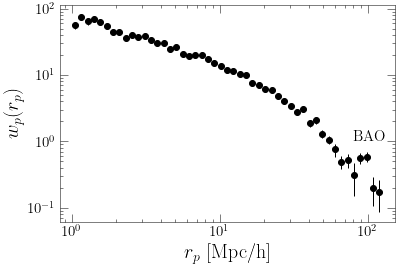

In [6]:
plt.scatter(cf['rp'], cf['wp'], c='k')
plt.errorbar(cf['rp'], cf['wp'], yerr=cf['wp_err'], ecolor='k', fmt='none')
plt.xscale('log')
plt.yscale('log')
plt.text(80, 1, 'BAO', fontsize=15)
plt.xlabel('$r_{p}$ [Mpc/h]')
plt.ylabel('$w_{p} (r_{p})$')

Also calculate 2D clustering and plot

/home/graysonpetter/miniconda3/envs/agn22/lib/python3.10/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\
/home/graysonpetter/ssd/Dartmouth/common_tools/Corrfunc_Helper/corrfunc_helper/plots.py:42: RuntimeWarning: invalid value encountered in log10
  logxi = np.log10(cf2d)


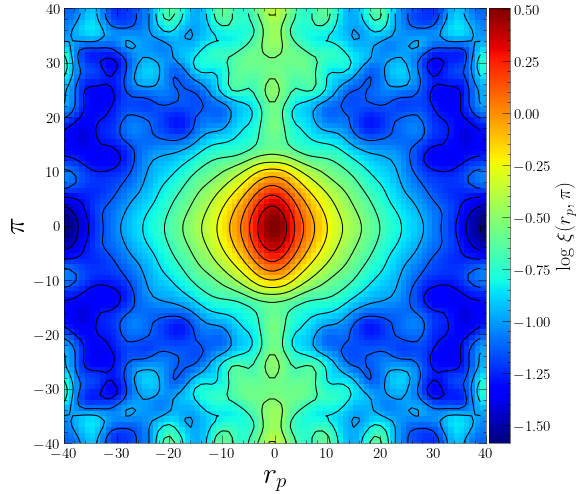

In [7]:
cfplt = mycf.autocorr_from_coords(coords=coords, randcoords=randcoords, scales=rp_bins, 
                               weights=data['weight'], randweights=rand['weight'], 
                               nthreads=16, estimator='LS', pimax=pimax, nbootstrap=500, plot_2dcf=True)

Calculate angular clustering by omitting distances

In [8]:
coords = (data['RA'], data['DEC'], None)
randcoords = (rand['RA'], rand['DEC'], None)

In [9]:
# angular bins from 10^-2 to 1 degrees
theta_bins = np.logspace(-2, 0, 50)

In [10]:
cf = mycf.autocorr_from_coords(coords=coords, randcoords=randcoords, scales=theta_bins, 
                               weights=data['weight'], randweights=rand['weight'], 
                               nthreads=16, estimator='LS', pimax=pimax, nbootstrap=500)

/home/graysonpetter/miniconda3/envs/agn22/lib/python3.10/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\
/home/graysonpetter/ssd/Dartmouth/common_tools/Corrfunc_Helper/corrfunc_helper/twoPointCFs.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  counts = np.array(counts)


Text(0, 0.5, '$w(\\theta)$')

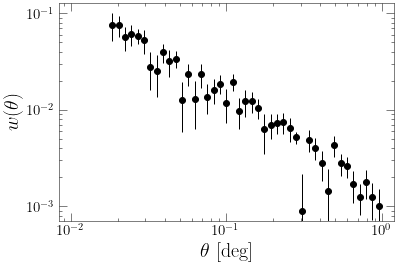

In [11]:
plt.scatter(cf['theta'], cf['w_theta'], c='k')
plt.errorbar(cf['theta'], cf['w_theta'], yerr=cf['w_err'], ecolor='k', fmt='none')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$w(\theta)$')